# Explanation of the ALPA Algorithm

In [1]:
import json
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras.models as models
from sklearn.datasets import make_classification

from rea.data.data import Data
from rea.extraction.alpa.alpa import generate_points, generate_valleypoints

get_nearest


# Pycharms autoformatter is crazy about the imports...

## Creating a Dataset

Create a 2-dimensional dataset with 2 classes for easy visualization.

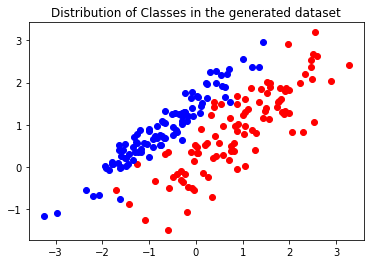

In [2]:
# for reproduction
random_state = 4206931
X, y = make_classification(
    n_samples=200, n_classes=2, n_features=2,
    n_informative=2, n_redundant=0, n_clusters_per_class=1,
    class_sep=0.8, random_state=random_state)
c_0 = X[y == 0]
c_1 = X[y == 1]
plt.scatter(c_0[:, 0], c_0[:, 1], color="r")
plt.scatter(c_1[:, 0], c_1[:, 1], color="b")
plt.title("Distribution of Classes in the generated dataset")
plt.show()

In [3]:
# save the dataset
data = pd.DataFrame()
data["x"] = X[:, 0]
data["y"] = X[:, 1]
data["l"] = y
data.to_csv("explain_alpa.csv", index=False)

## Train a Model

In [4]:
conf_name = "explain_alpa_config.json"
config = {
    "global": {
        "seed": random_state
    },
    "data": {
        "input_path": "explain_alpa.csv",
        "test_size": 0.1,
        "dataset_name": "Explain-ALPA",
        "label_col": 2
    },
    "model": {
        "hidden_layer_units": [10, 5, 3],
        "hidden_layer_activations": ["relu", "relu", "relu"],
        "use_class_weights": True,
        "batch_size": 2,
        "epochs": 25,
        "output_path": "explain_alpa_model"
    }
}
with open(conf_name, "w+") as file:
    json.dump(config, file)

subprocess.run(["pipenv", "run", "python", "-m", "rea", "-t", conf_name],
               check=True)

2022-01-18 20:35:49.458468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 20:35:49.629778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 20:35:49.630228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 20:35:49.632050: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/25
90/90 [==============================] - 3s 2ms/step - loss: 0.6281 - accuracy: 0.6778
Epoch 2/25
90/90 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7444
Epoch 3/25
90/90 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8389
Epoch 4/25
90/90 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8833
Epoch 5/25
90/90 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.9111
Epoch 6/25
90/90 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.9333
Epoch 7/25
90/90 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.9389
Epoch 8/25
90/90 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.9444
Epoch 9/25
90/90 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.9500
Epoch 10/25
90/90 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.9556
Epoch 11/25
90/90 [

2022-01-18 20:36:01.718005: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


CompletedProcess(args=['pipenv', 'run', 'python', '-m', 'rea', '-t', 'explain_alpa_config.json'], returncode=0)

## Use the Model for Prediction

2022-01-18 20:36:04.243528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 20:36:04.301392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 20:36:04.301651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 20:36:04.302203: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

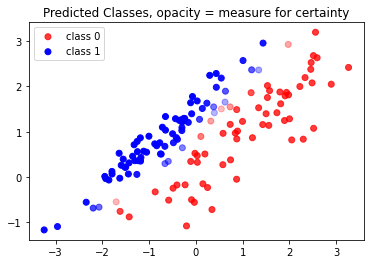

In [5]:
data_mod = Data("explain_alpa.csv", dataset_name="Explain-ALPA",
                label_col=2)
data_mod.run_default()

model = models.load_model("explain_alpa_model")
data_p = model.predict(data_mod.x_train)
pred_classes = np.argmax(data_p, axis=1)
c_0 = data_mod.x_train[pred_classes == 0]
c_1 = data_mod.x_train[pred_classes == 1]
c_0_colors = [(1, 0, 0, a ** 2) for a in data_p[pred_classes == 0][:, 0]]
c_1_colors = [(0, 0, 1, a ** 2) for a in data_p[pred_classes == 1][:, 1]]
plt.scatter(c_0[:, 0], c_0[:, 1], color=c_0_colors, label="class 0")
plt.scatter(c_1[:, 0], c_1[:, 1], color=c_1_colors, label="class 1")
plt.title("Predicted Classes, opacity = measure for certainty")
plt.legend()
plt.show()

## Use ALPA Functions to Generate More Points

A set of "valley points" is created. Those are the top $Nv$ points with the lowest confidence (the closer the softmax distribution of the predictions is to 50/50, the less confident).

A matrix containing the distances between valley points of different classes is created. Those distances are used to create new samples between the valley points of one class and the corresponding nearest points of the other class.

These are then added to the dataset to train the whitebox. The hope is, that by training the whitebox with these new points, which are near the decision boundary of the blackbox, the fidelity between the whitebox and blackbox is increased.

In [6]:
# number of valley points
Nv = 15
oracle_train = model.predict(data_mod.x_train)
valleypoints, valleypoint_classes = generate_valleypoints(data_mod.x_train,
                                                          oracle_train,Nv)
print(valleypoints)

[[ 0.54564707  1.50297377]
 [-1.7035429  -0.54933515]
 [ 0.39683449  1.41784558]
 [ 0.62566909  1.65336972]
 [ 1.97638084  2.92645781]
 [ 1.3443523   2.36248917]
 [ 0.32069678  1.23439161]
 [ 0.7340082   1.5480398 ]
 [-0.28768455  0.64538087]
 [ 0.10727     0.89511113]
 [-0.58887243  0.34575707]
 [-0.65971383  0.29571477]
 [ 0.38168497  1.54787824]
 [-2.0706332  -0.6659933 ]
 [ 1.19395219  2.36631369]]


In [7]:
nearest = get_nearest(valleypoint_classes, valleypoints)
artificial = generate_points(valleypoints, 25, nearest)
#print(artificial)

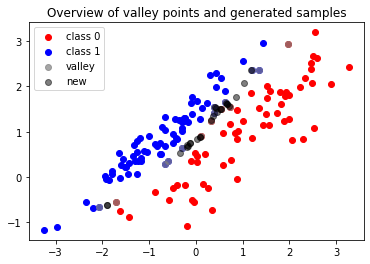

In [8]:
plt.scatter(c_0[:, 0], c_0[:, 1], color="r", label="class 0")
plt.scatter(c_1[:, 0], c_1[:, 1], color="b", label="class 1")
plt.scatter(valleypoints[:, 0], valleypoints[:, 1], c="grey", alpha=0.7,
            label="valley")
plt.scatter(artificial[:, 0], artificial[:, 1], c="black", alpha=0.5,
            label="new")
plt.title("Overview of valley points and generated samples")
plt.legend()
plt.show()

In [9]:
artificial_classes = np.argmax(model.predict(artificial), axis=1)
c_0_a = artificial[artificial_classes == 0]
c_1_a = artificial[artificial_classes == 1]

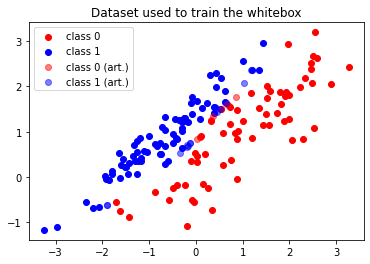

In [10]:
plt.scatter(c_0[:, 0], c_0[:, 1], color="r", label="class 0")
plt.scatter(c_1[:, 0], c_1[:, 1], color="b", label="class 1")
plt.scatter(c_0_a[:, 0], c_0_a[:, 1], color="r", alpha=0.5,
            label="class 0 (art.)")
plt.scatter(c_1_a[:, 0], c_1_a[:, 1], color="b", alpha=0.5,
            label="class 1 (art.)")
plt.title("Dataset used to train the whitebox")
plt.legend()
plt.show()